# Find all extreme events

In [1]:
from datetime import datetime, timedelta
import os
import h5py
import numpy as np
import pandas as pd
import csv
import config as conf
from pysteps.io import read_timeseries, archive
from matplotlib import pyplot as plt
from batchcreator import DataGenerator, load_fns_pysteps
from pysteps.visualization import plot_precip_field

Pysteps configuration file found at: /Users/mozykhau/.conda/envs/precipitation-nowcasting-using-GANs/lib/python3.7/site-packages/pysteps/pystepsrc



## Define functions and catchment coordinates

In [2]:
# catchment coordinate
catchment={
'Hupsel': (473, 476, 421, 424),
'Regge': (450, 494, 371, 410),
'GroteWaterleiding': (456, 467, 409, 421),
'Aa': (386, 431, 467, 515),
'Reusel': (369, 381, 487, 517),
'Luntersebeek': (391, 406, 422, 432),
'Dwarsdiep': (427, 442, 290, 304),
'HHRijnland': (332, 343, 429, 444),
'Beemster': (340, 351, 370, 382),
'DeLinde': (414, 439, 322, 340),
'Delfland': (296, 322, 432, 457)}

def daterange(start, end, step=timedelta(1)):
    curr = start
    while curr < end:
        yield curr
        curr += step
def eventGeneration(start_time, obs_time = 4 ,lead_time = 72):
    # Generate event based on starting time point, return a list: [[t-4,...,t-1,t], [t+1,...,t+72]]
    # Get the start year, month, day, hour, minute
    year = int(start_time[0:4])
    month = int(start_time[4:6])
    day = int(start_time[6:8])
    hour = int(start_time[8:10])
    minute = int(start_time[10:12])
    #print(datetime(year=year, month=month, day=day, hour=hour, minute=minute))
    times = [(datetime(year, month, day, hour, minute) + timedelta(minutes=5 * (x+1))) for x in range(lead_time)]
    lead = [dt.strftime('%Y%m%d%H%M') for dt in times]
    times = [(datetime(year, month, day, hour, minute) - timedelta(minutes=5 * x)) for x in range(obs_time)]
    obs = [dt.strftime('%Y%m%d%H%M') for dt in times]
    obs.reverse()
    return lead, obs
# data analysis

## Find average precipitation over catchment for frame

In [4]:
# Specify catchemnt
catchmentName = 'Delfland'
ymin, ymax, xmin, xmax = catchment[catchmentName]
# open the file in the write mode
prefix = conf.dir_aart
lead_time = 36
time_interval = 5
start = datetime(2008, 1, 1, 0, 0)
# end = datetime(2008, 1, 5, 23, 55)
end = datetime(2021, 12, 30, 23, 55)
event_sum = {}
dates = daterange(start, end, step = timedelta(minutes = time_interval))
start=datetime.now()
prev_month ="-1"
for time in dates:
    event_start_time = time.strftime('%Y%m%d%H%M')
    year = event_start_time[0:4]
    month = event_start_time[4:6]
    if month != prev_month:
        print(year+'/'+month)
    prev_month = month
    if os.path.exists(prefix + year + "/" + month + "/" + \
                      "RAD_NL25_RAC_MFBS_EM_5min_" + event_start_time + "_NL.h5"):

        filename = prefix + year + "/" + month + "/" + \
                   "RAD_NL25_RAC_MFBS_EM_5min_" + event_start_time + "_NL.h5"
        f = h5py.File(filename)['image1']['image_data']
        f = np.array(f)
        # xmin, xmax, ymin, ymax = catchment[catchmentName]
        f = np.where(f == 65535, 0, f)
        f = f[xmin:xmax, ymin:ymax] / 100
        event_average = np.sum(f)/f.size
        event_sum[event_start_time] = event_average
        #print(f_accum.size)
        # extreme_event_result[event_lead_list[0]] = event_average
    else:
        print("file not found")
        # print(prefix + year_start + "/" + month_start + "/" +
        #               "RAD_NL25_RAC_MFBS_EM_5min_" + event_lead_list[0] + "_NL.h5")
        # print(prefix + year_end + "/" + month_end + "/" + \
        #                 "RAD_NL25_RAC_MFBS_EM_5min_" + event_lead_list[-1] + "_NL.h5")

average_list_np = np.asarray(event_sum)
currentdate = datetime.now()
currentdate = currentdate.strftime('%Y%m%d%H%M')
np.save('/Users/mozykhau/University/Extreme event project/Data/Extreme events/'+catchmentName+'_2008-2021_sum_'+currentdate+'.npy', average_list_np)
# print("Total time for 1 day is "+ str(datetime.now()-start))
# file.close()

2008/01
2008/02
2008/03
2008/04
2008/05
2008/06
2008/07
2008/08
2008/09
2008/10
2008/11
2008/12
2009/01
2009/02
2009/03
2009/04
2009/05
2009/06
2009/07
2009/08
2009/09
2009/10
2009/11
2009/12
2010/01
2010/02
2010/03
2010/04
2010/05
2010/06
2010/07
2010/08
2010/09
2010/10
2010/11
2010/12
2011/01
2011/02
2011/03
2011/04
2011/05
2011/06
2011/07
2011/08
2011/09
2011/10
2011/11
2011/12
2012/01
2012/02
2012/03
2012/04
2012/05
2012/06
2012/07
2012/08
2012/09
2012/10
2012/11
2012/12
2013/01
2013/02
2013/03
2013/04
2013/05
2013/06
2013/07
2013/08
2013/09
2013/10
2013/11
2013/12
2014/01
2014/02
2014/03
2014/04
2014/05
2014/06
2014/07
2014/08
2014/09
2014/10
2014/11
2014/12
2015/01
2015/02
2015/03
2015/04
2015/05
2015/06
2015/07
2015/08
2015/09
2015/10
2015/11
2015/12
2016/01
2016/02
2016/03
2016/04
2016/05
2016/06
2016/07
2016/08
2016/09
2016/10
2016/11
2016/12
2017/01
2017/02
2017/03
2017/04
2017/05
2017/06
2017/07
2017/08
2017/09
2017/10
2017/11
2017/12
2018/01
2018/02
2018/03
2018/04
2018/05


## Load data

In [5]:
ex_ev_check = np.load('/Users/mozykhau/University/Extreme event project/Data/Extreme events/Delfland_2008-2021_sum_202205011700.npy',allow_pickle=True)

In [6]:
ex_ev_check_dict = dict(ex_ev_check.item())
names = ['Date','Precipitation']
formats = ['U12','f8']
dtype = dict(names = names, formats=formats)
event_array = np.array(list(ex_ev_check_dict.items()),dtype=dtype)

## Calculate average precipitation over sequence of events

In [7]:
# open file
currentdate = datetime.now()
currentdate = currentdate.strftime('%Y%m%d%H%M')
file = open('/Users/mozykhau/University/Extreme event project/Data/Extreme events/'+catchmentName+'_2008-2021_sum_'+currentdate+'.csv', 'w', newline='')
# create the csv writer
writer = csv.writer(file)
writer.writerow(["time", "precipitation"])
ex_ev_check_dict = ex_ev_check_dict
event_array = event_array
lead_time = 36
time_interval = 5
start = datetime(2008, 1, 1, 0, 0)
# end = datetime(2008, 12, 30, 23, 55)
end = datetime(2021, 12, 30, 23, 55)
dates = daterange(start, end, step = timedelta(minutes = time_interval))
start_timer=datetime.now()
for time in dates:
    event_start_time = time.strftime('%Y%m%d%H%M')
    event_lead_list, event_obs_list = eventGeneration(event_start_time, 5 ,lead_time)
    for t in event_lead_list:
        try:
            f = ex_ev_check_dict[t]
        except KeyError:
            print("Date "+ str(t)+" is not found")
            break
        if t == event_lead_list[0]:
            f_accum = f
        else:
            f_accum += f
    event_average = np.sum(f_accum)/lead_time
    #print(f_accum.size)
    # extreme_event_result[event_lead_list[0]] = event_average
    writer.writerow([event_lead_list[0], event_average])
file.close

Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202112302355 is not found
Date 202

<function TextIOWrapper.close()>

## Create datasets for 1% and 5%

In [8]:
#   Load data with name, precipitation average.
file = "/Users/mozykhau/University/Extreme event project/Data/Extreme events/Delfland_2008-2021_sum_202205021133.csv"
names = ['time','precipitation']
formats = ['U12','f8']
dtype = dict(names = names, formats=formats)
df = pd.read_csv(file)
#   Sort by precipitation
sorted_df = df.sort_values(by='precipitation',ascending=False)
print("Length of data is "+ str(sorted_df.__len__()))
sorted_df = sorted_df[sorted_df.precipitation>0.01]
print("Length of data bigger 0.01 is "+ str(sorted_df.__len__()))
# print(sorted_df[:5])
len = sorted_df.__len__()
#   Take top 1%
len1 = len//100
len5 = len//20
extreme_event_set = sorted_df[:len1]
extreme_event_set.set_index('time')
moderate_event_set = sorted_df[:len5]
moderate_event_set.set_index('time')
print("Length of data 1% is " +str(extreme_event_set.__len__())+"\nLength of data 5% is "+ str(moderate_event_set.__len__()))
#   Save .npy file with names of frames as extreme

Length of data is 1472270
Length of data bigger 0.01 is 217682
Length of data 1% is 2176
Length of data 5% is 10884


### Plot example

<GeoAxesSubplot:>

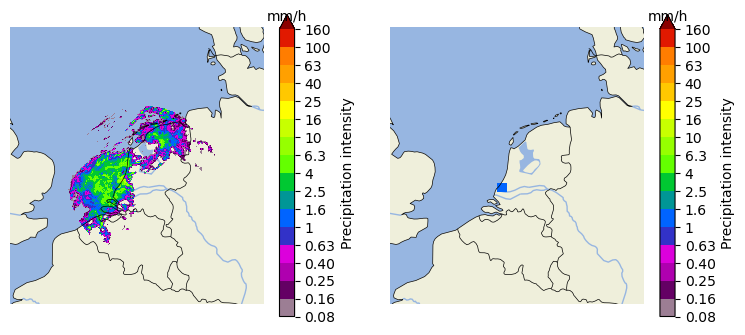

In [72]:
root_path = conf.dir_rtcor    # directions to data directory
path_fmt = "%Y/%m" # how files are sorted in folders (no subfolders)
fn_pattern = conf.prefix_rtcor+"%Y%m%d%H%M" # filename pattern
fn_ext = "h5"   # filename extension
timestep = 30

catchmentName = 'Delfland'
ymin, ymax, xmin, xmax = catchment[catchmentName]
dt_inp = str(extreme_event_set['time'].iloc[30])
val_row = [[dt_inp],[dt_inp]]
_,_,metadata,_ = load_fns_pysteps(val_row)
dt_inp = datetime.strptime(dt_inp, "%Y%m%d%H%M")
filename = archive.find_by_date(dt_inp, root_path, path_fmt, fn_pattern, fn_ext, timestep=timestep)
address = filename[0]
f = h5py.File(address[0])['image1']['image_data']
f = np.array(f)
f = np.where(f == 65535, 0, f)
f = f * 12 / 100
plt.figure(figsize=(9, 5), dpi=100)
plt.subplot(1,2,1)
plot_precip_field(f,geodata=metadata, axis="on")
plt.subplot(1,2,2)
f_check = np.zeros((765,700))
f_check[xmin:xmax, ymin:ymax] = 1
plot_precip_field(f_check,geodata=metadata, axis="on")

## Save list of extemes and moderates

In [172]:
save_extreme_set = extreme_event_set.to_numpy()
save_moderate_set = moderate_event_set.to_numpy()
np.save('/Users/mozykhau/University/Extreme event project/Data/Extreme events/extremes'+catchmentName+'_2008-2021_sum.npy', save_extreme_set)
np.save('/Users/mozykhau/University/Extreme event project/Data/Extreme events/moderate'+catchmentName+'_2008-2021_sum.npy', save_moderate_set)

In [176]:
extreme_date = extreme_event_set['time'].to_numpy()
moderate_date = moderate_event_set['time'].to_numpy()
np.save('/Users/mozykhau/University/Extreme event project/Data/Extreme events/extreme dates'+catchmentName+'_2008-2021_sum.npy', save_extreme_set)
np.save('/Users/mozykhau/University/Extreme event project/Data/Extreme events/moderate dates'+catchmentName+'_2008-2021_sum.npy', save_moderate_set)